In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate data; y = 2x + noise
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1,1)
y = 2 * X + np.random.randn(100, 1) * 0.3

# initialize parameters
W1 = np.random.randn(1, 4)
b1 = np.zeros((1, 4))

W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

lr = 0.01
epochs = 500
losses = []

# activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# training loop
for epoch in range(epochs):

    # forward pass
    z1 = X @ W1 + b1
    a1 = relu(z1)

    z2 = a1 @ W2 + b2
    y_pred = z2

    # Loss (MSE)
    loss = np.mean((y - y_pred)**2)
    losses.append(loss)

    # Backward pass
    dL_dy = -2 * (y - y_pred) / len(y)

    dW2 = a1.T @ dL_dy
    db2 = np.sum(dL_dy, axis=0, keepdims=True)

    da1 = dL_dy @ W2.T
    dz1 = da1 * relu_derivative(z1)

    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

print("Training Completed")

Epoch 0 | Loss: 7.9415
Epoch 100 | Loss: 1.2644
Epoch 200 | Loss: 0.7858
Epoch 300 | Loss: 0.5250
Epoch 400 | Loss: 0.3503
Training Completed


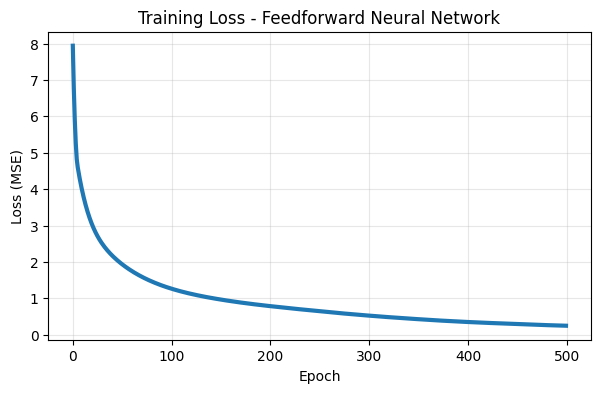

In [2]:
plt.figure(figsize=(7,4))
plt.plot(losses, linewidth=3)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss - Feedforward Neural Network")
plt.grid(alpha=0.3)
plt.show()

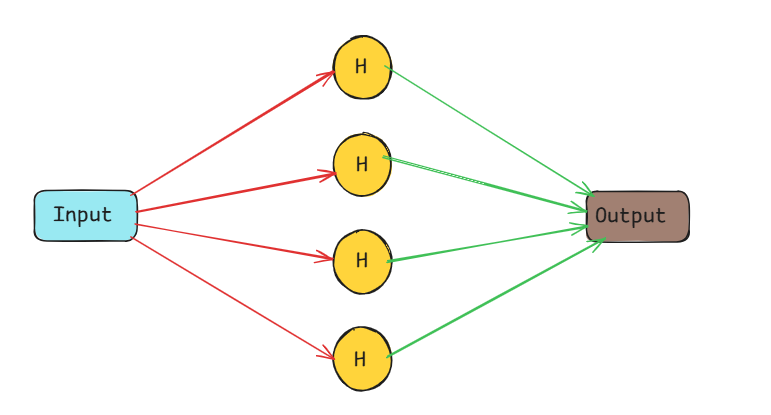